In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data into dataframe
sales=pd.read_csv('C:\\Users\\user\\Downloads\\Sales_add.csv')

In [3]:
sales

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [4]:
# Display the first five rows of the data
sales.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [5]:
# number of rows and columns
sales.shape

(22, 5)

In [6]:
# get information about the data
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [7]:
# generate descriptive statistics
sales.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [8]:
# checking the null values
sales.isnull().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

# 1.

In [9]:
# calculate the difference in sales
sales['Sales_Difference']=sales['Sales_After_digital_add(in $)']-sales['Sales_before_digital_add(in $)']

In [10]:
sales['Sales_Difference']

0     137469
1      73775
2      97965
3      79641
4      98877
5     119785
6      91481
7      99497
8      55002
9      51779
10     43836
11     97340
12     60118
13    101617
14     81873
15     10110
16     94046
17     23521
18     94905
19     60086
20    115963
21    112757
Name: Sales_Difference, dtype: int64

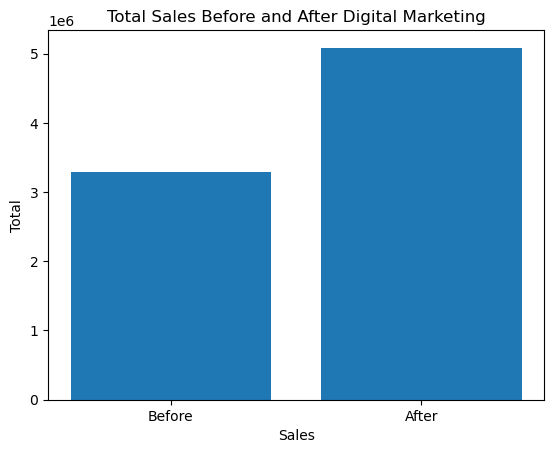

In [11]:
# create a bar chart to compare sales before and after
plt.bar(['Before','After'],[sales['Sales_before_digital_add(in $)'].sum(),sales['Sales_After_digital_add(in $)'].sum()])
plt.xlabel('Sales')
plt.ylabel('Total')
plt.title('Total Sales Before and After Digital Marketing')
plt.show()

In [12]:
from scipy.stats import ttest_rel

In [13]:
# perform a paired t-test
t_statistic,p_value=ttest_rel(sales['Sales_before_digital_add(in $)'],sales['Sales_After_digital_add(in $)'])
if p_value<0.05:
    print('There is a significant increase in sales after implementing digital marketing.')
else:
    print('There is no significant increase in sales after implementing digital marketing.')

There is a significant increase in sales after implementing digital marketing.


# 2.

In [14]:
# Create a cross-tabulation between Region and Manager
cross_tab = pd.crosstab(sales['Region'],sales['Manager'])

In [15]:
cross_tab

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [16]:
# Perform a chi-square test
from scipy.stats import chi2_contingency

In [17]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab)
if p_value < 0.05:
    print("There is a dependency between Region and Manager.")
else:
    print("There is no dependency between Region and Manager.")

There is no dependency between Region and Manager.
